In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from math import gcd
import pandas as pd
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

In [2]:
def initialize_qubits(given_circuit, n, m):
    given_circuit.h(range(n))
    given_circuit.x(n+m-1) 

In [3]:
def c_amod15(a, x):
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11,13")
    U = QuantumCircuit(4)        
    for iteration in range(x):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, x)
    c_U = U.control()
    return c_U

In [4]:
def modular_exponentiation(circuit, n, m, a):
    for x in range(n):
        exponent = 2**x
        circuit.append(c_amod15(a, exponent), 
                     [x] + list(range(n, n+m)))

In [5]:
def inverse_qft(circuit, measurement_qubits):
    circuit.append(QFT( len(measurement_qubits), do_swaps=False).inverse(), measurement_qubits)

/Users/mashalbhatti/anaconda3/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


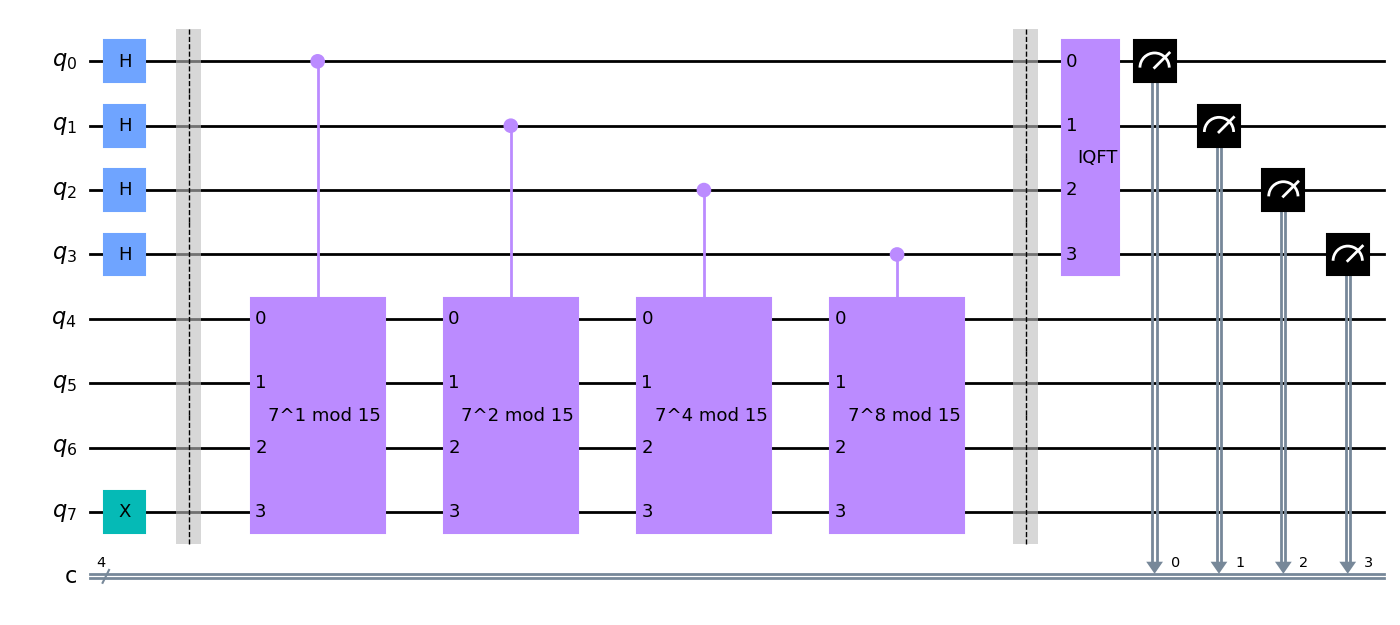

In [7]:
def shors_algorithm(n, m, a):
    
   
    qc = QuantumCircuit(n+m, n)
    
  
    initialize_qubits(qc, n, m)
    qc.barrier()

   
    modular_exponentiation(qc, n, m, a)
    qc.barrier()

 
    inverse_qft(qc, range(n))

    
    qc.measure(range(n), range(n))
    
    return qc
    
n = 4; m = 4; a = 7
final_circuit = shors_algorithm(n, m, a)
final_circuit.draw(output='mpl')

In [9]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(final_circuit, backend=simulator, shots=1000).result().get_counts(final_circuit)

In [10]:
for measured_value in counts: 
    print(" {int(measured_value[::-1], 2)}")

 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}


In [11]:
for i in counts:
    measured_value = int(i[::-1], 2)
  
    
    if measured_value % 2 != 0:
        print("Measured value not even")
        continue #measured value should be even as we are doing a^(r/2) mod N and r/2 should be int
    x = int((a ** (measured_value/2)) % 15)
    if (x + 1) % 15 == 0:
        continue
    factors = gcd(x + 1, 15), gcd(x - 1, 15) #we saw earlier that a^(r/2)+1 or a^(r/2)-1 should be a factor of 15
    print(factors)

Measured value not even
(1, 3)
Measured value not even
Measured value not even
(1, 3)
(1, 3)
(1, 15)
(5, 3)
Measured value not even
Measured value not even
Measured value not even
(5, 3)
(1, 15)
